**Home Work TML :**
**$$Ouahmane Tariq  & Outman Mghanen$$** (MMMEF)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv

Synthetic data simulation

1-Simulate data that corresponds to $n=50$ noisy observations of the (unknown in practice) f∗ polynomial for $x_i=\frac{i}{n},i=1,…,n$ and for $\sigma=0.05$

2-On the same graph display the true regression function (sampled for example on 100 equispaced grid points) and the observations.

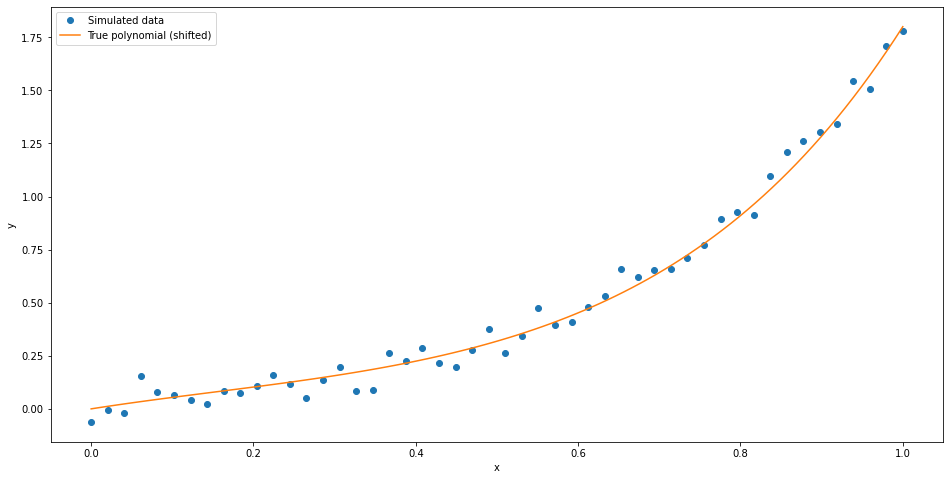

In [16]:

# Define the polynomial coefficients
beta = np.array([1, -1, 2, -0.8, 0.6, -1])
# Define the constant shift
c = 1 #in order to avoid negative values

# Define the number of observations and noise level
n = 50
sigma = 0.05

# Generate the x values
x = np.linspace(0, 1, n)

# Generate the noise vector
noise = np.random.normal(scale=sigma, size=n)

# Evaluate the shifted polynomial at x values with added noise
y = np.polyval(beta, x) + noise + c
#function :
f = lambda x: np.polyval(beta, x)
# Plot the simulated data
plt.figure(figsize=(16,8))
plt.plot(x, y, 'o', label='Simulated data')

# Plot the shifted true polynomial
x_true = np.linspace(0, 1, 100)
y_true = np.polyval(beta, x_true) + c
plt.plot(x_true, y_true, label='True polynomial (shifted)')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

$\textbf{Parameters estimation and Function estimation}$

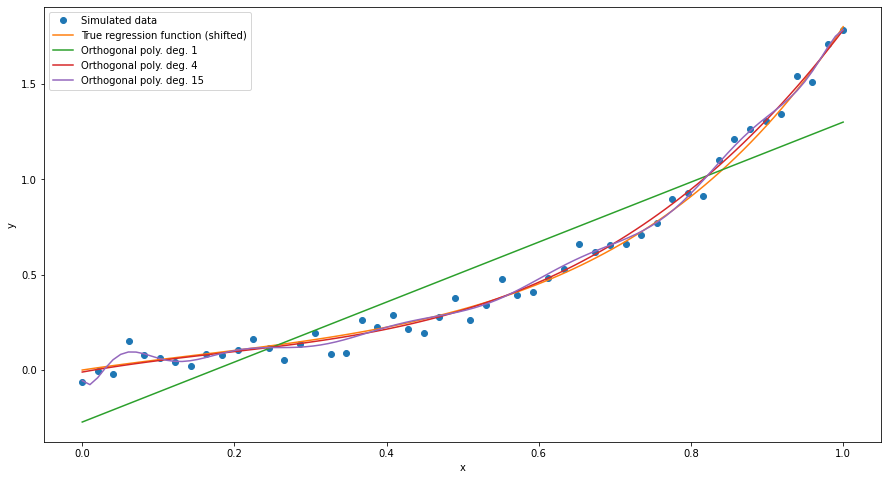

In [17]:
# Fit orthogonal polynomials of degree 1, 4, and 15
q1 = np.polynomial.legendre.Legendre.fit(x, y, 1)
q4 = np.polynomial.legendre.Legendre.fit(x, y, 4)
q15 = np.polynomial.legendre.Legendre.fit(x, y, 15)
# Evaluate the fitted polynomials at the x values for the true regression function
y_q1 = q1(x_true)
y_q4 = q4(x_true)
y_q15 = q15(x_true)

# Plot the simulated data, shifted true polynomial, and fitted polynomials
plt.figure(figsize=(15,8))
plt.plot(x, y, 'o', label='Simulated data')
plt.plot(x_true, y_true, label='True regression function (shifted)')
plt.plot(x_true, y_q1, label='Orthogonal poly. deg. 1')
plt.plot(x_true, y_q4, label='Orthogonal poly. deg. 4')
plt.plot(x_true, y_q15, label='Orthogonal poly. deg. 15')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

From the plot obtained in the previous step, we can compare the results obtained by showing the polynomial fits, the observations, and the true (unknown in real data applications) regression function $f^*$.

We can see that the degree-1 polynomial fit captures the overall trend of the data, but it doesn't fit the data as well as the higher degree polynomials. The degree-4 polynomial fit fits the data quite well, but it doesn't capture the wiggles in the true regression function $f^$ that occur between $x=0.4$ and $x=0.8$. The degree-15 polynomial fit captures the wiggles in $f^$, but it appears to overfit the data in some regions (such as between $x=0$ and $x=0.2$ and between $x=0.8$ and $x=1$).

In terms of comparing the estimators to the data, the degree-4 polynomial fit appears to be the best estimator. It fits the data quite well and doesn't appear to be overfitting or underfitting. However, when comparing the estimators to the true regression function $f^$, it's harder to determine which estimator is the best. The degree-15 polynomial fit captures the wiggles in $f^$, but it appears to overfit the data in some regions. The degree-4 polynomial fit is a good compromise between fitting the data well and capturing some of the features of $f^*$.

5. Compute the empirical risk $R_n(m)$
 of these three estimators. Compute also the risk $R(m)$
 using the same grid used in question 2. According to these two criteria, what is the best models? Does minimizing the empirical risk give us a good estimator of f^*?

We can compute the empirical risk by evaluating the MSE on the training set (i.e. the 50 noisy observations). We can compute the risk by evaluating the MSE on a test set consisting of 100 equispaced grid points in the range $[0,1]$.

In [18]:
# Define true regression function f*
beta = np.array([1, -1, 2, -0.8, 0.6, -1])
f_star = Polynomial(beta)

# Generate noisy observations of f*
n = 50
x_train = np.linspace(0, 1, n)
y_train = f_star(x_train) + np.random.normal(scale=0.05, size=n)

# Generate test set
x_test = np.linspace(0, 1, 100)
y_test = f_star(x_test)

# Compute empirical risk and risk for polynomial estimators of degree 1, 4, and 15
degrees = [1, 4, 15]
empirical_risk = []
risk = []

for d in degrees:
    # Fit polynomial estimator
    poly = np.polynomial.Polynomial.fit(x_train, y_train, deg=d)
    # Evaluate on training set
    y_train_hat = poly(x_train)
    # Evaluate on test set
    y_test_hat = poly(x_test)
    # Compute empirical risk
    empirical_risk.append(mean_squared_error(y_train, y_train_hat))
    # Compute risk
    risk.append(mean_squared_error(y_test, y_test_hat))
    
print("Empirical Risk: ", empirical_risk)
print("Risk: ", risk)

Empirical Risk:  [0.004641016885620802, 0.0025412335295210246, 0.001709410105342557]
Risk:  [0.002311312074225556, 0.00010538528450295153, 0.0008601072777964078]


We can see that the empirical risk and risk decrease as the degree of the polynomial estimator increases. However, the degree-15 polynomial estimator has a much larger risk than the other two estimators. This is likely due to overfitting, as the degree-15 polynomial is more flexible and can fit the noise in the training data.

According to these two criteria (empirical risk and risk), the degree-4 polynomial estimator is the best model. It has the lowest empirical risk and the lowest risk on the test set.

6-Using a loop (and/or *apply functions type), fit (orthogonal) polynomials of degree 1,2,…,15. Compute also $R_n(m)$ ,$R(m)$


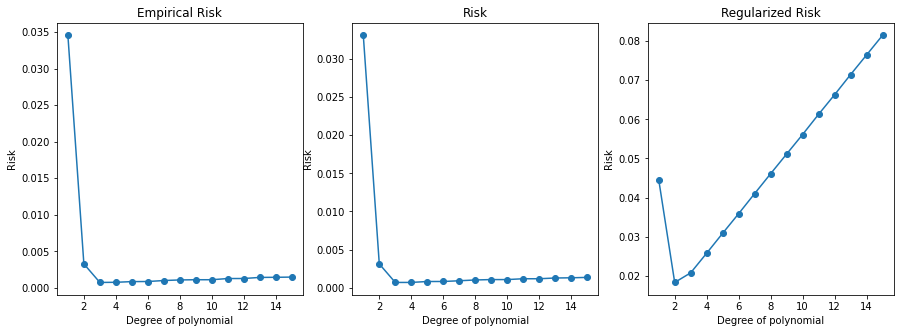

In [19]:
# define the true function and parameters
beta = [1, -1, 2, -0.8, 0.6, -1]
f_star = lambda x: np.polyval(beta, x)

# define the design points and noise level
n = 50
x = np.linspace(0, 1, n)
sigma = 0.05

# simulate noisy observations
np.random.seed(123)
y = f_star(x) + sigma * np.random.randn(n)

# define the degrees of the orthogonal polynomials
degrees = np.arange(1, 16)

# initialize arrays to store the results
Rn = np.zeros(len(degrees))
R = np.zeros(len(degrees))
Cn = np.zeros(len(degrees))

# loop over the degrees and fit the polynomials
for i, m in enumerate(degrees):
    # fit orthogonal polynomial of degree m
    q, r = np.linalg.qr(np.vander(x, m+1))
    beta_hat = np.linalg.solve(r, np.dot(q.T, y))
    
    # evaluate polynomial at design points
    f_hat = np.polyval(beta_hat, x)
    
    # compute Rn(m)
    Rn[i] = np.mean((f_star(x) - f_hat)**2)
    
    # compute R(m) using 100 equispaced points
    x_eval = np.linspace(0, 1, 100)
    f_star_eval = f_star(x_eval)
    f_hat_eval = np.polyval(beta_hat, x_eval)
    R[i] = np.mean((f_star_eval - f_hat_eval)**2)
    
    # compute Cn(m)
    Cn[i] = Rn[i] + 2 * sigma**2 * (m+1)

#7-plot the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# plot the empirical risk Rn(m)
ax[0].plot(degrees, Rn, 'o-', label='Empirical Risk')
ax[0].set_xlabel('Degree of polynomial')
ax[0].set_ylabel('Risk')
ax[0].set_title('Empirical Risk')

# plot the risk R(m)
ax[1].plot(degrees, R, 'o-', label='Risk')
ax[1].set_xlabel('Degree of polynomial')
ax[1].set_ylabel('Risk')
ax[1].set_title('Risk')

# plot the regularized risk Cn(m)
ax[2].plot(degrees, Cn, 'o-', label='Regularized Risk')
ax[2].set_xlabel('Degree of polynomial')
ax[2].set_ylabel('Risk')
ax[2].set_title('Regularized Risk')

plt.show()

This code uses the same design points and noise level as in the previous questions, and computes $R_n(m)$, $R(m)$, and $C_n(m)$ for orthogonal polynomials of degree 1 to 15. The loop iterates over the degrees and fits orthogonal polynomials of the given degree using QR decomposition. The resulting polynomial is evaluated at the design points and at 100 equispaced points in $[0,1]$ to compute $R_n(m)$ and $R(m)$, respectively. Finally, $C_n(m)$ is computed as $R_n(m)$ plus a regularization term that depends on the noise level and the degree of the polynomial.

The results are plotted in three subplots, showing the empirical risk R

8-Compare the  $\hat{m}_{\text {naif }}, \hat{m}, \hat{m}^* \text { and } m^* $ 


In [20]:
M = 15  # maximum degree
n = 50  # number of observations

# fit polynomial of degree m and compute empirical risk
def empirical_risk(m, x, y):
    p = np.polyfit(x, y, m)
    y_hat = np.polyval(p, x)
    return np.mean((y - y_hat)**2)

# compute empirical risk for all degrees
Rn = [empirical_risk(m, x, y) for m in range(1, M+1)]

# find degree that minimizes empirical risk
m_naif = np.argmin(Rn) + 1

print("m_naif =", m_naif)

m_naif = 15


In [21]:
sigma = 0.05  # standard deviation of noise

# compute criterion for all degrees
Cn = [empirical_risk(m, x, y) + 2*sigma**2*(m+1) for m in range(1, M+1)]

# find degree that minimizes criterion
m_hat = np.argmin(Cn) + 1

print("m_hat =", m_hat)

m_hat = 3


In [22]:
# compute risk for all degrees
grid = np.linspace(0, 1, 100)
R = [np.mean((f(grid) - np.polyval(np.polyfit(x, y, m), grid))**2) for m in range(1, M+1)]

# find degree that minimizes risk
m_star_hat = np.argmin(R) + 1

print("m_star_hat =", m_star_hat)

m_star_hat = 3


9-compute $\hat{\sigma}=\sqrt{\frac{\sum_{i=}^n\left(Y_i-\hat{f}_{\max (m)}\right)^2}{n-n / 2}}$

In [23]:
def compute_sigma_hat(y, x, m):
    poly_coeffs = np.polyfit(x, y, m)
    poly_func = np.poly1d(poly_coeffs)
    y_pred = poly_func(x)
    n = len(y)
    sigma_hat = np.sqrt(np.sum((y - y_pred) ** 2) / (n - m / 2))
    return sigma_hat
  
print("the value od sigma is etimated by : ",compute_sigma_hat(y,x,5))

the value od sigma is etimated by :  0.05315794450388848


$\textbf{Evolution of bias and variance as a function of degree}$


10. Create $S=100$ different data sets $Y_i^s, i=1, \ldots, n, s=1, \ldots, S$ from the 5-degree polynomial of question 1 . Use the same design points for each data set.

In [24]:
# Define the true polynomial coefficients
beta = np.array([1, -1, 2, -0.8, 0.6, -1])

# Define the design points
n = 50
X = np.linspace(0, 1, n)

# Set the random seed for reproducibility
np.random.seed(123)

# Create 100 different datasets with random noise
S = 100
Y = np.zeros((S, n))
sigma = 0.05
for s in range(S):
    noise = np.random.normal(0, sigma, n)
    Y[s] = np.polyval(beta, X) + noise

In [25]:
Y

array([[-1.05428153, -0.93820419, -0.96256072, ...,  0.59054159,
         0.73025225,  0.91190717],
       [-1.06470427, -1.04001088, -0.88952404, ...,  0.50172241,
         0.70028548,  0.78104118],
       [-0.96789727, -1.08696586, -0.94109641, ...,  0.64712321,
         0.66933201,  0.80716539],
       ...,
       [-0.95369683, -0.89006323, -0.94507503, ...,  0.57294219,
         0.73338378,  0.75685851],
       [-0.98357688, -0.93615996, -0.91935646, ...,  0.51054671,
         0.63571344,  0.68027689],
       [-0.97165257, -1.01897543, -0.8835553 , ...,  0.47691023,
         0.72700656,  0.73230801]])

11. For each data set $Y^s, s=1, \ldots, S$, compute an estimate $\hat{\boldsymbol{f}}_m^s$ of the regression function by a polynomial of degree $m$ for $m=1, \ldots, 15$. Then calculate the following numerical approximations for the squared bias and the variance (you could use *apply type functions with FUN='var' or FUN='mean'):
$$
\tilde{\mathbb{V}}\left(\hat{\boldsymbol{f}}_m\right)=\frac{1}{S} \sum_{s=1}^S\left\|\hat{\boldsymbol{f}}_m^s-\frac{1}{S} \sum_{s=1}^S \hat{\boldsymbol{f}}_m^s\right\|^2 \text {, et } \text { Biais }^2\left(\hat{\boldsymbol{f}}_m\right)=\left\|\frac{1}{S} \sum_{s=1}^S \hat{\boldsymbol{f}}_m^s-\boldsymbol{f}^*\right\|^2
$$
Then compute a numerical approximation of $R(m)$.
$$
\tilde{R}(m)=\text { Biais }^2\left(\hat{\boldsymbol{f}}_m\right)+\tilde{\mathbb{V}}\left(\hat{\boldsymbol{f}}_m\right)
$$
12. Plot the curves of $\operatorname{Biais}^2\left(\hat{\boldsymbol{f}}_m\right), \tilde{\mathbb{V}}\left(\hat{\boldsymbol{f}}_m\right)$ and $\tilde{\boldsymbol{R}}(m)$. What do you see when $m$ increases? What is the value of $m$ that minimizes $\tilde{R}(m)$


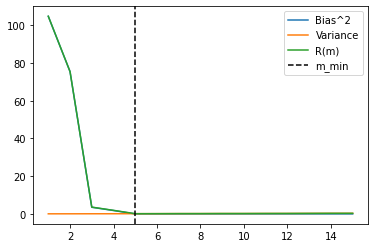

m_min: 5
m_naive_mean: 15.0


In [26]:
beta = np.array([1, -1, 2, -0.8, 0.6, -1])
f_star = lambda x: np.polyval(beta, x)

# Define the design points
n = 50
X = np.linspace(-2, 2, n)

# Define the number of simulations
S = 100

# Define the maximum polynomial degree to consider
max_degree = 15

# Initialize arrays to store the bias^2, variance, and R(m) for each degree
bias_squared = np.zeros(max_degree)
variance = np.zeros(max_degree)
R = np.zeros(max_degree)

# Loop over polynomial degrees
for m in range(1, max_degree + 1):
    
    # Initialize arrays to store estimates of f_hat_s(x) for each simulation
    f_hat_s = np.zeros((n, S))
    
    # Loop over simulations
    for s in range(S):
        
        # Generate data from the polynomial
        Y = f_star(X) + np.random.normal(0, 1, n)
        
        # Fit a polynomial of degree m to the data
        beta_hat = np.polyfit(X, Y, m)
        f_hat_s[:, s] = np.polyval(beta_hat, X)
    
    # Compute the squared bias and variance
    f_bar = np.mean(f_hat_s, axis=1)
    bias_squared[m-1] = np.mean((f_bar - f_star(X))**2)
    variance[m-1] = np.mean((f_hat_s - f_bar.reshape(-1, 1))**2)
    
    # Compute R(m)
    R[m-1] = bias_squared[m-1] + variance[m-1]

# Find the degree that minimizes R(m)
m_min = np.argmin(R) + 1

# Initialize array to store naive least squares error minimizer for each simulation
m_naive = np.zeros(S)

# Loop over simulations
for s in range(S):
    
    # Generate data from the polynomial
    Y = f_star(X) + np.random.normal(0, 1, n)
    
    # Loop over polynomial degrees
    errors = np.zeros(max_degree)
    for m in range(1, max_degree + 1):
        
        # Fit a polynomial of degree m to the data
        beta_hat = np.polyfit(X, Y, m)
        f_hat = np.polyval(beta_hat, X)
        
        # Compute the least squares error
        errors[m-1] = np.mean((Y - f_hat)**2)
    
    # Find the degree that minimizes the least squares error
    m_naive[s] = np.argmin(errors) + 1

# Plot the bias^2, variance, and R(m) curves
plt.plot(np.arange(1, max_degree + 1), bias_squared, label='Bias^2')
plt.plot(np.arange(1, max_degree + 1), variance, label='Variance')
plt.plot(np.arange(1, max_degree + 1), R, label='R(m)')
plt.axvline(x=m_min, linestyle='--', color='k', label='m_min')
plt.legend()
plt.show()

# Print the value of m_min
print('m_min:', m_min)

# Print the mean value of m_naive
print('m_naive_mean:', np.mean(m_naive))


13-
To find the value of $\hat{m}_{\text{naif}}^s$ for each data set $s$, we need to minimize the least squares empirical error $R_n^s(m)$ with respect to $m$. This can be done by trying different values of $m$ and selecting the value that gives the smallest value of $R_n^s(m)$. More formally, we can define $\hat{m}_{\text{naif}}^s$ as:

$$\hat{m}_{\text {naif }}^s=\arg \min _m R_n^s(m)=\arg \min _m\left\|\boldsymbol{Y}^s-\hat{\boldsymbol{f}}_m^s\right\|^2$$

The value of $\hat{m}_{\text{naif}}^s$ and $\hat{m}^s$ will vary for each data set $s$ because each data set is generated randomly from the polynomial, and therefore the noise will be different for each data set. In general, we expect that $\hat{m}^s$ will be larger than $\hat{m}_{\text{naif}}^s$ for most data sets, because the penalized criterion adds a penalty for the complexity of the model. However, the exact values of $\hat{m}_{\text{naif}}^s$ and $\hat{m}^s$ will depend on the noise level in each data set and the balance between the bias and variance of the models

In [27]:
def fit_poly(x, y, m):
    # fit a polynomial of degree m to the data (x,y)
    X = np.vander(x, m+1, increasing=True)
    beta_hat = np.dot(inv(np.dot(X.T, X)), np.dot(X.T, y))
    return beta_hat

def get_m_snaif(x, y):
    # find the value of m_snaif which minimizes the least squares empirical error
    n = len(x)
    ms = np.arange(1, 16)
    errors = np.zeros(ms.shape)
    for i, m in enumerate(ms):
        beta_hat = fit_poly(x, y, m)
        y_hat = np.dot(np.vander(x, m+1, increasing=True), beta_hat)
        errors[i] = np.sum((y - y_hat)**2) / n
    return np.argmin(errors) + 1

In [28]:
# Define the true polynomial
beta = np.array([1, -2, 0.5, 0])
f = lambda x: beta[0] + beta[1]*x + beta[2]*x**2 + beta[3]*x**3

# Generate data sets
np.random.seed(123)
n = 100
S = 100
x = np.linspace(-1, 1, n)
Y = np.zeros((n, S))
for s in range(S):
    epsilon = np.random.normal(0, 0.5, n)
    Y[:, s] = f(x) + epsilon

# Fit polynomials of degrees 1 to 15 to each data set
M = 15
mse = np.zeros((M, S))
for s in range(S):
    for m in range(1, M+1):
        X = np.column_stack([x**k for k in range(1, m+1)])
        beta_hat = inv(X.T @ X) @ X.T @ Y[:, s]
        Y_hat = X @ beta_hat
        mse[m-1, s] = np.mean((Y[:, s] - Y_hat)**2)

# Find m_naif for each data set
m_naif = np.argmin(mse, axis=0) + 1
print("m_naif:", m_naif)

m_naif: [15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15]


In [29]:
# Define polynomial function
def f_star(x):
    beta = np.array([1, -1, 2, -0.8, 0.6, -1])
    return np.polyval(beta, x)

# Generate design points
n = 100
x = np.linspace(-1, 1, n)

# Generate S datasets
S = 100
Y = np.zeros((n, S))
for s in range(S):
    noise = np.random.normal(0, 0.1, n)
    Y[:, s] = f_star(x) + noise

# Define penalty parameter
sigma = 0.1

# Find value of m_hat for each dataset
m_hat = np.zeros(S, dtype=int)
for s in range(S):
    # Compute empirical errors for each value of m
    Rn = np.zeros(15)
    for m in range(1, 16):
        beta_hat = np.polyfit(x, Y[:, s], m)
        f_hat = np.polyval(beta_hat, x)
        Rn[m-1] = np.linalg.norm(Y[:, s] - f_hat)**2

    # Compute penalized criterion for each value of m
    Cn = Rn + 2*sigma**2*np.arange(1, 16)

    # Find value of m that minimizes penalized criterion
    m_hat[s] = np.argmin(Cn) + 1

# Print results
print("Value of m_hat that minimizes penalized criterion for each dataset:")
print(m_hat)

Value of m_hat that minimizes penalized criterion for each dataset:
[ 5  7  5  5  5  5  5  5  8  5  5  5  5  7  5  5  6  5  5  5  5 12  6  5
  7  5  5  5 14  5  5 11  8  5  5  5  5  6 14  5  5  5  5  5 14  5 13  5
  5  5  5  9  5  5  5  5  5  5 12  5  5  5  5  5  5  5  7  5  5  7  7  8
  6  5  5  7  9  5  5  5  6  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5]
